# CONFIG

In [3]:
import pandas as pd 
import numpy as np

import geopandas as gpd


import seaborn as sns

# Livrarias para ler dados do openstreetmaps e representação da rede de estradas como um grafo
import osmnx as ox
import networkx as nx

import re

#import pgeocode as pgc
#import geopy

import time

import matplotlib.pyplot as plt

import os

import pickle 






In [4]:
from tqdm import tqdm
#{progress in percentage} | {bar} | {processed}/{total} [{elapsed time}<{remaining time}, {number of iterations per seconds} it/s]

In [5]:
os.getcwd()

'c:\\Users\\pauloricardolb\\OneDrive - Universidade de Aveiro\\TRABALHO_SCRIPS\\py_GeoIdentifZones\\Main\\PreProcessing'

# Directorias

In [6]:
#PC UA
pathUA = "C:/Users/pauloricardolb/"
pathHPCasa = "C:/Users/Paulo B/" 

path = pathUA

path_DRIVITUP_SIG = "Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/SIG/"
path_DRIVITUP_TABLES = "Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/TABELAS/"

In [7]:
# SOURCE FOR PIKLE DATA
sourcePIKLE = path + "OneDrive - Universidade de Aveiro/TRABALHO_SCRIPS/py_GeoIdentifZones/DATA_Pikle"

sourcePIKLE_CBOD = path + "OneDrive - Universidade de Aveiro/TRABALHO_SCRIPS/geoKDD_cbod/DATA_Pikle"

## DADOS

In [8]:
sourceSIG_BASE_CAOP_gdb = path + path_DRIVITUP_SIG + "BASES_ADMIN_NACIONAL/ADMIN_CAOP_BASES.gdb"
sourceSIG_BASE_CAOP_gdb

'C:/Users/pauloricardolb/Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/SIG/BASES_ADMIN_NACIONAL/ADMIN_CAOP_BASES.gdb'

In [9]:
sourceSIG_BASE_BGRI_gdb = path + path_DRIVITUP_SIG +  "BASE_INE/BGRI_SIG/BGRI_PTCONTINENTE.gdb"
sourceSIG_BASE_BGRI_gdb

'C:/Users/pauloricardolb/Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/SIG/BASE_INE/BGRI_SIG/BGRI_PTCONTINENTE.gdb'

In [10]:
sourceSIG_BASE_COS_gdb = path + path_DRIVITUP_SIG +  "COS/COS.gdb"
sourceSIG_BASE_COS_gdb

'C:/Users/pauloricardolb/Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/SIG/COS/COS.gdb'

In [11]:
sourceSIG_BASE_VARIOS_gdb = path + path_DRIVITUP_SIG +  "GEODATA_VARIOS.gdb"
sourceSIG_BASE_VARIOS_gdb



'C:/Users/pauloricardolb/Universidade de Aveiro/OP_DRIVIT-UP - Documentos/01_BASESDEDADOS/SIG/GEODATA_VARIOS.gdb'

In [12]:
sourceSIG_CBOD_gdb = path + "Documents/ArcGIS/Projects/CBOD/CBOD.gdb"
sourceSIG_CBOD_gdb

'C:/Users/pauloricardolb/Documents/ArcGIS/Projects/CBOD/CBOD.gdb'

In [13]:
sourceTABLE_CENSOS2011_BGRI = path + path_DRIVITUP_TABLES + "CENSOS2011_BGRI/" 
sourceTABLE_OSM = path + path_DRIVITUP_TABLES + "OSM/" 
sourceTABLE_CAOPDESCODIFICA = path + path_DRIVITUP_TABLES + "CAOP_DESCODIFICA/" 
sourceTABLE_INE_TABELASVARIAS = path + path_DRIVITUP_TABLES + "INE_TABELAS_VARIAS/"
sourceTABLE_INE_PEDIDO1 = path + path_DRIVITUP_TABLES + "INE_PEDIDO_1/"
sourceTABLE_INE_PEDIDO2 = path + path_DRIVITUP_TABLES + "INE_PEDIDO_2/"
sourceTABLE_INE_PEDIDO3 = path + path_DRIVITUP_TABLES + "INE_PEDIDO_3/"
sourceTABLE_INE_PEDIDO4 = path + path_DRIVITUP_TABLES + "INE_PEDIDO_4/"
sourceTABLE_DEMOGRAFIA = path + path_DRIVITUP_TABLES + "DEMOGRAFIA/"
sourceTABLE_VARIOS = path + path_DRIVITUP_TABLES + "TABELAS/VARIOS/"

# NOTAS

ETRS89 / Portugal TM06 - EPSG:3763

WGS 84 - 4326


»» Coments:
To add line comments, execute editor.action.addCommentLine (CTRL+K CTRL+C)
To remove line comments, execute editor.action.removeCommentLine (CTRL+K CTRL+U

# BGRI11 INE PTCont

In [14]:
BGRI11_CONT_CLEAN = gpd.read_file(sourceSIG_BASE_BGRI_gdb, layer="BGRI11_CONT_CLEAN")
BGRI11_CONT_CLEAN_URB = BGRI11_CONT_CLEAN[BGRI11_CONT_CLEAN["LUG11"] != "999999"]
BGRI11_CONT_CLEAN_URB[:3]

,DTMN11,BGRI11,LUG11,LUG11DESIG,DICOFRE,AREASUBSEC11,Shape_Length,Shape_Area,geometry
0,0407,04070200104,013810,Abreiro,040702,114463.564987,2127.892679,114463.564987,"MULTIPOLYGON (((70385.364 187253.985, 70468.97..."
1,0407,04070200106,013810,Abreiro,040702,54224.329878,1129.357468,54224.329878,"MULTIPOLYGON (((70345.582 187206.405, 70365.69..."
2,0407,04070200101,013811,Milhais,040702,66225.007920,1585.958933,66225.007920,"MULTIPOLYGON (((67451.278 188137.559, 67436.48..."


# AVRILH Case Study

<AxesSubplot: >

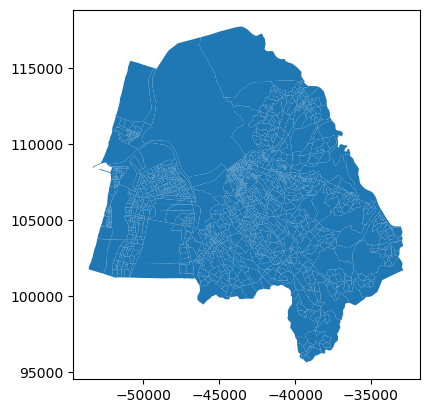

In [15]:
case_study_DTMN11 = ['0105','0110']
BGRI11_AVRILH = BGRI11_CONT_CLEAN[BGRI11_CONT_CLEAN['DTMN11'].isin(case_study_DTMN11)]
BGRI11_AVRILH.insert(0, 'CS', 'cs')
BGRI11_AVRILH[:3]
BGRI11_AVRILH.plot()

In [16]:
BGRI11_AVRILH.head()

,CS,DTMN11,BGRI11,LUG11,LUG11DESIG,DICOFRE,AREASUBSEC11,Shape_Length,Shape_Area,geometry
16863,cs,0105,01050100510,014757,Aveiro,010501,141979.280116,1609.722426,141979.280116,"MULTIPOLYGON (((-43593.399 105717.183, -43670...."
16864,cs,0105,01050100512,014757,Aveiro,010501,174175.515121,2078.292089,174175.515121,"MULTIPOLYGON (((-43164.196 105698.880, -43157...."
16865,cs,0105,01050100701,014731,Bom Sucesso,010501,142290.509789,1977.776122,142290.509789,"MULTIPOLYGON (((-43359.708 105180.143, -43315...."
31320,cs,0105,01051201803,014757,Aveiro,010512,93782.407361,2105.903866,93782.407361,"MULTIPOLYGON (((-42260.680 107955.967, -42278...."
31321,cs,0105,01050201005,014737,Quinta do Loureiro,010502,115017.661542,1460.479229,115017.661542,"MULTIPOLYGON (((-38567.090 112031.679, -38552...."


# AVRILH Full nodes - PCA Reduction 

In [18]:
open_file = open(sourcePIKLE_CBOD + '/gdf_nodes_PTcrs_AVRILHOri_full_db.pkl', "rb")
gdf_nodes_PTcrs_AVRILHOri_full_db = pickle.load(open_file)
open_file.close()

In [103]:
print(gdf_nodes_PTcrs_AVRILHOri_full_db.shape)
gdf_nodes_PTcrs_AVRILHOri_full_db.head()


(10886, 77)


,osmid,y,x,ref,highway,street_count,geometry,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,...,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km,OSMNid
0,26018652,40.573359,-8.561106,15,motorway_junction,3,POINT (-36240.866 100587.667),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26018669,40.567454,-8.560672,NaN,NaN,3,POINT (-36207.316 99931.795),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26018671,40.568421,-8.560302,15,motorway_junction,3,POINT (-36175.496 100039.002),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26019628,40.627240,-8.730450,1,motorway_junction,3,POINT (-50539.674 106654.463),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26019631,40.625874,-8.726227,1A,motorway_junction,3,POINT (-50183.405 106500.389),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
pd.DataFrame(gdf_nodes_PTcrs_AVRILHOri_full_db.columns).to_csv("gdf_nodes_PTcrs_AVRILHOri_full_db_ColNames.csv")

In [104]:
gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA = gdf_nodes_PTcrs_AVRILHOri_full_db.drop(columns=[ "y",	"x", "ref", "highway", "street_count", "geometry",
                                                                                            "OSMNid_x", "OSMNid_y", "ids", "n", "m", "OSMNid", 
                                                                                            "node_density_km", "intersection_density_km", "edge_density_km", 
                                                                                            "street_density_km", "circuity_avg", "self_loop_proportion", 
                                                                                            "clean_intersection_count", "clean_intersection_density_km"])

print(gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA.shape)
gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA.head()

(10886, 57)


,osmid,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_3OUMAIS,CountSUBSEC,N_EDIFICIOS_CLASSICOS_ISOLADOS_perc,N_EDIFICIOS_CLASSICOS_GEMIN_perc,...,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count
0,26018652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26018669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26018671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26019628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26019631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA = gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA.dropna(how='any')
print(gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA.shape)
gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA.head()

(3579, 57)


,osmid,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_3OUMAIS,CountSUBSEC,N_EDIFICIOS_CLASSICOS_ISOLADOS_perc,N_EDIFICIOS_CLASSICOS_GEMIN_perc,...,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count
6,26019651,221.0,151.0,37.0,12.0,200.0,19.0,11.0,0.755000,0.185000,...,2.952381,17.0,2.809524,4.2,0.2,2689.935,86.772097,1854.344,88.302095,21.0
7,26019652,239.0,161.0,45.0,12.0,218.0,19.0,12.0,0.738532,0.206422,...,2.909091,18.0,2.818182,4.4,0.2,2734.655,85.457969,1899.064,86.321091,22.0
20,267983421,127.0,36.0,29.0,0.0,65.0,59.0,13.0,0.553846,0.446154,...,4.216216,69.0,3.081081,14.8,0.2,5607.617,35.946263,3643.929,35.037779,104.0
22,267983429,274.0,49.0,37.0,41.0,127.0,141.0,17.0,0.385827,0.291339,...,4.186667,70.0,3.080000,15.0,0.2,5662.569,36.067318,3698.881,35.227438,105.0
23,267983444,313.0,73.0,39.0,12.0,124.0,184.0,18.0,0.588710,0.314516,...,4.184211,71.0,3.078947,15.2,0.2,5742.681,36.117491,3738.937,35.272991,106.0


In [108]:
OSMID_gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA = gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA.osmid
gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA = gdf_nodes_PTcrs_AVRILHOri_full_db.drop(columns=[ "osmid"])

In [23]:
# Data normalization
# Inspired on: https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475


from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA_stand = pd.DataFrame(std_scaler.fit_transform(gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA), columns=gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA.columns)
print(gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA_stand.shape)
gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA_stand.head()

(3579, 56)


,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_3OUMAIS,CountSUBSEC,N_EDIFICIOS_CLASSICOS_ISOLADOS_perc,N_EDIFICIOS_CLASSICOS_GEMIN_perc,N_EDIFICIOS_CLASSICOS_EMBANDA_perc,...,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count
0,-0.461283,0.533282,-0.450218,-0.538125,-0.272348,-0.518420,-0.353457,1.149503,-0.501657,-0.823287,...,-0.748750,-0.264584,-0.102866,-0.240400,-0.489071,0.255443,0.528596,0.572602,0.591896,-0.278180
1,-0.338388,0.669742,-0.290346,-0.538125,-0.142820,-0.518420,-0.244139,1.075826,-0.340241,-0.844713,...,-0.808162,-0.215405,-0.069230,-0.198545,-0.489071,0.285324,0.492652,0.622024,0.537922,-0.244723
2,-1.103068,-1.036012,-0.610089,-0.656834,-1.243808,0.180073,-0.134822,0.249547,1.466147,-1.082787,...,0.985769,2.292738,0.952108,1.977935,-0.489071,2.204993,-0.861578,2.550349,-0.859341,2.498728
3,-0.099425,-0.858613,-0.450218,-0.251246,-0.797656,1.611986,0.302448,-0.502166,0.299608,0.313476,...,0.945214,2.341917,0.947908,2.019791,-0.489071,2.241711,-0.858267,2.611079,-0.854174,2.532185
4,0.166847,-0.531109,-0.410250,-0.538125,-0.819244,2.362866,0.411766,0.405525,0.474252,-0.664238,...,0.941844,2.391096,0.943819,2.061646,-0.489071,2.295241,-0.856895,2.655347,-0.852933,2.565641


In [24]:
# Create an array to feed PCA
gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA_stand_Array = gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA_stand.to_numpy()
print(gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA_stand_Array.shape)
gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA_stand_Array

(3579, 56)


array([[-0.46128291,  0.5332819 , -0.4502176 , ...,  0.57260238,
         0.59189608, -0.27817966],
       [-0.33838783,  0.66974223, -0.29034571, ...,  0.62202436,
         0.53792171, -0.24472294],
       [-1.10306833, -1.0360118 , -0.61008948, ...,  2.55034915,
        -0.85934143,  2.49872791],
       ...,
       [-0.46128291, -0.16266574, -0.49018557, ...,  2.55034915,
        -0.85934143,  2.49872791],
       [-0.22914776, -0.25818796, -0.33031368, ..., -0.84245105,
        -0.07654077, -0.67966027],
       [-0.22914776, -0.25818796, -0.33031368, ...,  0.13517806,
        -0.57212891,  0.08984423]])

In [25]:
# Perform PCA
# Inspired on: https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b


from sklearn.decomposition import PCA


pca = PCA()

X_test_pca_fit = pca.fit((gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA_stand))
X_test_pca_fit_Transform = pca.fit_transform((gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA_stand))



In [26]:
X_test_pca_fit.explained_variance_

array([1.52333023e+01, 6.99700924e+00, 3.70359097e+00, 3.27900477e+00,
       2.52285138e+00, 2.34915031e+00, 2.16707768e+00, 1.99215108e+00,
       1.87848815e+00, 1.79412121e+00, 1.55414212e+00, 1.47065856e+00,
       1.39851624e+00, 1.24356704e+00, 1.12896370e+00, 1.08630876e+00,
       1.02488633e+00, 7.47109043e-01, 6.98188834e-01, 5.75406932e-01,
       5.21642507e-01, 4.50510531e-01, 3.74215721e-01, 3.33237616e-01,
       3.21140601e-01, 2.28566215e-01, 1.97457641e-01, 1.40258003e-01,
       1.19758963e-01, 1.05242412e-01, 1.02361886e-01, 7.86545958e-02,
       5.87111237e-02, 5.70628144e-02, 2.69974175e-02, 1.49773909e-02,
       1.48574670e-02, 7.63456874e-03, 6.75607714e-03, 4.38009285e-03,
       3.64903907e-03, 1.98841594e-03, 7.00942018e-04, 2.45047086e-04,
       8.98656174e-05, 4.49567368e-05, 7.40615814e-06, 4.27630389e-06,
       2.04850508e-06, 8.86586675e-07, 3.47980165e-31, 1.30255635e-31,
       1.23715563e-31, 1.19818285e-31, 8.57447243e-32, 7.59401555e-32])

In [27]:
X_test_pca_fit_Transform.shape

(3579, 56)

In [28]:
n_comp = sum(i >= 1 for i in X_test_pca_fit.explained_variance_)
n_comp

17

In [42]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA = pd.DataFrame(X_test_pca_fit_Transform).iloc[:,0:16]

In [47]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA["osmid"] = gdf_nodes_PTcrs_AVRILHOri_full_db.osmid
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA["geometry"] = gdf_nodes_PTcrs_AVRILHOri_full_db.geometry
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA = gpd.GeoDataFrame(gdf_nodes_PTcrs_AVRILHOri_full_db_PCA, geometry='geometry', crs="EPSG:3763")

In [48]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,osmid,geometry
0,-1.017654,-0.289915,1.439985,-1.940020,-0.584064,-0.831864,1.491476,-0.196011,-0.464940,0.180441,0.048880,-0.724075,-1.086519,1.433112,-0.909541,0.861083,26018652,POINT (-36240.866 100587.667)
1,-0.937415,-0.444248,1.431632,-2.051705,-0.512686,-0.925572,1.713602,-0.222954,-0.361477,0.081259,0.163066,-0.715358,-1.081893,1.362139,-0.790838,0.868614,26018669,POINT (-36207.316 99931.795)
2,5.660074,5.212804,-5.342864,-2.584561,1.991947,8.069591,-0.041628,0.039779,4.356668,-0.784657,2.275259,-5.812810,-1.756486,2.215339,-0.373755,2.028368,26018671,POINT (-36175.496 100039.002)
3,5.761233,1.659789,-4.998370,-1.359095,1.181509,3.890934,-0.115911,0.186719,2.394496,0.015720,1.231987,-1.240272,-0.117959,1.730586,-0.734931,0.140295,26019628,POINT (-50539.674 106654.463)
4,6.306318,2.939258,-4.741841,-2.540861,0.750059,6.055908,0.022314,-0.050201,3.433773,0.201950,1.647413,-3.068247,-0.462553,0.811183,0.990635,0.558032,26019631,POINT (-50183.405 106500.389)


In [102]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA.shape

(3579, 18)

In [32]:
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", fit_inverse_transform=True
    )



X_test_kernel_pca_fit = kernel_pca.fit((gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA_stand))
X_test_kernel_pca_fit_Transform = kernel_pca.fit_transform((gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA_stand))


In [33]:
n_comp = sum(i >= 1 for i in X_test_kernel_pca_fit.eigenvalues_)
n_comp

246

In [34]:
list_cols = [i for i in range(len( X_test_kernel_pca_fit.eigenvalues_ )) if  X_test_kernel_pca_fit.eigenvalues_[i] >= 1]


In [35]:
pd.DataFrame(X_test_kernel_pca_fit_Transform).iloc[:,list_cols]

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,-0.185597,0.218535,0.042767,-0.058560,0.274813,0.054555,-0.158037,-0.016261,0.307682,0.039511,...,-0.002004,-0.002213,0.001142,0.010114,0.002066,0.012765,0.003326,0.000612,0.002699,-0.013878
1,-0.171054,0.233720,0.024125,-0.051572,0.277307,0.037758,-0.156686,-0.019672,0.321721,0.034312,...,-0.000920,0.000413,0.001340,0.010468,0.000954,0.010277,0.005150,0.000530,0.001856,-0.010566
2,0.306400,-0.190477,-0.271474,0.101580,0.050511,0.067458,0.041241,-0.060153,0.031248,-0.011842,...,-0.009391,-0.062340,-0.004289,0.027388,0.011996,0.005695,0.045923,-0.010608,0.032844,-0.032279
3,0.421398,-0.051917,-0.045960,0.179565,-0.038477,0.121273,0.180744,-0.128027,0.025657,-0.011725,...,-0.041123,0.028300,-0.004153,0.002568,-0.009356,-0.003718,-0.006571,-0.010053,-0.011574,0.002733
4,0.369845,-0.144986,-0.190305,0.137149,0.016132,0.123883,0.126041,-0.111553,0.023638,-0.021482,...,0.018199,0.023917,0.008892,0.003444,-0.012956,0.003706,-0.035936,-0.011441,0.006072,-0.002434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,0.001116,-0.010215,0.135106,0.465971,-0.099299,0.089419,-0.032885,-0.116017,0.147509,0.103621,...,0.041466,0.002837,-0.018483,-0.052534,0.011941,-0.007056,0.032263,-0.013040,0.028514,-0.017794
3575,0.183099,-0.186014,-0.064426,-0.051463,0.280789,0.057106,-0.126159,-0.018887,0.206369,-0.049241,...,-0.016010,-0.020284,-0.034126,-0.009680,0.027072,0.022118,-0.013614,-0.039951,0.002750,0.004657
3576,0.184159,-0.016825,0.029038,0.346117,0.086807,-0.087940,0.018326,0.118146,0.235220,0.194504,...,0.006942,0.006773,0.040406,0.001037,-0.016133,0.007670,0.034256,0.031627,-0.017405,-0.000280
3577,0.045695,-0.048262,0.220512,-0.130614,0.163618,-0.078084,-0.151309,-0.012358,-0.129230,-0.120064,...,-0.024853,0.018351,-0.008479,0.000598,-0.011084,-0.000573,-0.003036,-0.024698,-0.021175,0.023957


In [39]:
gdf_nodes_PTcrs_AVRILHOri_full_db_kernelPCA = pd.DataFrame(X_test_kernel_pca_fit_Transform).iloc[:,list_cols]
gdf_nodes_PTcrs_AVRILHOri_full_db_kernelPCA["osmid"] = gdf_nodes_PTcrs_AVRILHOri_full_db.osmid
gdf_nodes_PTcrs_AVRILHOri_full_db_kernelPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,osmid
0,-0.185597,0.218535,0.042767,-0.058560,0.274813,0.054555,-0.158037,-0.016261,0.307682,0.039511,...,-0.002213,0.001142,0.010114,0.002066,0.012765,0.003326,0.000612,0.002699,-0.013878,26018652
1,-0.171054,0.233720,0.024125,-0.051572,0.277307,0.037758,-0.156686,-0.019672,0.321721,0.034312,...,0.000413,0.001340,0.010468,0.000954,0.010277,0.005150,0.000530,0.001856,-0.010566,26018669
2,0.306400,-0.190477,-0.271474,0.101580,0.050511,0.067458,0.041241,-0.060153,0.031248,-0.011842,...,-0.062340,-0.004289,0.027388,0.011996,0.005695,0.045923,-0.010608,0.032844,-0.032279,26018671
3,0.421398,-0.051917,-0.045960,0.179565,-0.038477,0.121273,0.180744,-0.128027,0.025657,-0.011725,...,0.028300,-0.004153,0.002568,-0.009356,-0.003718,-0.006571,-0.010053,-0.011574,0.002733,26019628
4,0.369845,-0.144986,-0.190305,0.137149,0.016132,0.123883,0.126041,-0.111553,0.023638,-0.021482,...,0.023917,0.008892,0.003444,-0.012956,0.003706,-0.035936,-0.011441,0.006072,-0.002434,26019631


# AVRILH "LUGARES"

    LUG11        LUG11DESIG  \
0  014730            Aradas   
1  014731       Bom Sucesso   
2  014732  Quinta do Picado   
3  014733        Verdemilho   
4  014734            Cabeço   

                                            geometry  CS DTMN11       BGRI11  \
0  POLYGON ((-42347.885 104359.214, -42371.402 10...  cs   0105  01050100810   
1  POLYGON ((-42842.500 103212.794, -42840.230 10...  cs   0105  01050100701   
2  POLYGON ((-41869.122 102647.917, -41870.832 10...  cs   0105  01050101311   
3  POLYGON ((-44219.438 104995.105, -44221.696 10...  cs   0105  01050100304   
4  POLYGON ((-40349.528 111870.026, -40363.308 11...  cs   0105  01050200307   

  DICOFRE   AREASUBSEC11  Shape_Length     Shape_Area  
0  010501   80253.318546   1305.124436   80253.318546  
1  010501  142290.509789   1977.776122  142290.509789  
2  010501   23840.548304    761.592149   23840.548304  
3  010501   53631.884053   1184.130776   53631.884053  
4  010502   32841.751369    715.243921   32841.75136

<AxesSubplot: >

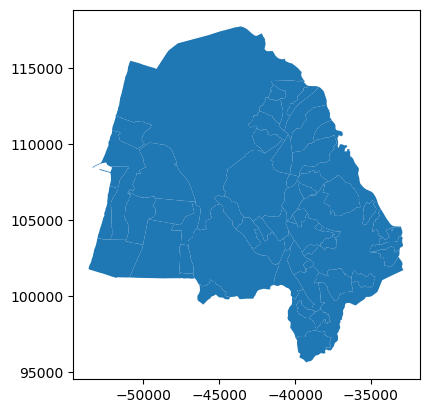

In [ ]:
shape_AVRILH_lugares = BGRI11_AVRILH.dissolve(by=["LUG11", "LUG11DESIG"], as_index=False)
print(shape_AVRILH_lugares.head())
shape_AVRILH_lugares.plot()

## Assign clusters: Overlap nodes atributes with "Lugares""

In [53]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces = gpd.sjoin(gdf_nodes_PTcrs_AVRILHOri_full_db_PCA, shape_AVRILH_lugares[['LUG11','LUG11DESIG', "geometry"]], how="left", op='intersects')
print(gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces.columns)
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces.head()

c:\Users\pauloricardolb\Anaconda3\envs\geopreprocess\Lib\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,            10,            11,
                  12,            13,            14,            15,
             'osmid',    'geometry', 'index_right',       'LUG11',
        'LUG11DESIG'],
      dtype='object')


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,osmid,geometry,index_right,LUG11,LUG11DESIG
0,-1.017654,-0.289915,1.439985,-1.940020,-0.584064,-0.831864,1.491476,-0.196011,-0.464940,0.180441,...,-0.724075,-1.086519,1.433112,-0.909541,0.861083,26018652,POINT (-36240.866 100587.667),23,014753,Mamodeiro
1,-0.937415,-0.444248,1.431632,-2.051705,-0.512686,-0.925572,1.713602,-0.222954,-0.361477,0.081259,...,-0.715358,-1.081893,1.362139,-0.790838,0.868614,26018669,POINT (-36207.316 99931.795),53,999999,Residual
2,5.660074,5.212804,-5.342864,-2.584561,1.991947,8.069591,-0.041628,0.039779,4.356668,-0.784657,...,-5.812810,-1.756486,2.215339,-0.373755,2.028368,26018671,POINT (-36175.496 100039.002),53,999999,Residual
3,5.761233,1.659789,-4.998370,-1.359095,1.181509,3.890934,-0.115911,0.186719,2.394496,0.015720,...,-1.240272,-0.117959,1.730586,-0.734931,0.140295,26019628,POINT (-50539.674 106654.463),52,014935,Gafanha da Nazaré
4,6.306318,2.939258,-4.741841,-2.540861,0.750059,6.055908,0.022314,-0.050201,3.433773,0.201950,...,-3.068247,-0.462553,0.811183,0.990635,0.558032,26019631,POINT (-50183.405 106500.389),46,014928,Gafanha da Encarnação


In [63]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces_withoutResiduals = gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces[gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces["LUG11"] != "999999"]
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces_withoutResiduals.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,osmid,geometry,index_right,LUG11,LUG11DESIG
0,-1.017654,-0.289915,1.439985,-1.940020,-0.584064,-0.831864,1.491476,-0.196011,-0.464940,0.180441,...,-0.724075,-1.086519,1.433112,-0.909541,0.861083,26018652,POINT (-36240.866 100587.667),23,014753,Mamodeiro
3,5.761233,1.659789,-4.998370,-1.359095,1.181509,3.890934,-0.115911,0.186719,2.394496,0.015720,...,-1.240272,-0.117959,1.730586,-0.734931,0.140295,26019628,POINT (-50539.674 106654.463),52,014935,Gafanha da Nazaré
4,6.306318,2.939258,-4.741841,-2.540861,0.750059,6.055908,0.022314,-0.050201,3.433773,0.201950,...,-3.068247,-0.462553,0.811183,0.990635,0.558032,26019631,POINT (-50183.405 106500.389),46,014928,Gafanha da Encarnação
5,-2.093439,0.283332,1.172348,-1.053886,-0.409644,-1.652278,0.631066,-0.127901,0.908274,-1.979165,...,-0.291459,-0.849124,0.231706,-1.793543,-0.006692,26019636,POINT (-49584.440 106514.588),52,014935,Gafanha da Nazaré
6,-4.538920,0.149456,-0.357551,1.045544,-0.343021,0.477342,0.321071,-0.381435,0.311227,-2.163480,...,-0.820196,0.761508,-0.486917,0.377479,-0.800700,26019651,POINT (-47191.393 107065.145),52,014935,Gafanha da Nazaré


In [64]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces_withoutResiduals.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,            10,            11,
                  12,            13,            14,            15,
             'osmid',    'geometry', 'index_right',       'LUG11',
        'LUG11DESIG'],
      dtype='object')

In [65]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces_withoutResiduals.rename(columns = {0:'PCA_01', 1:'PCA_02', 2:'PCA_03',
                                                                                        3:'PCA_04', 4:'PCA_05', 5:'PCA_06',
                                                                                        6:'PCA_07', 7:'PCA_08', 8:'PCA_09',
                                                                                        9:'PCA_10', 10:'PCA_11', 11:'PCA_12',
                                                                                        12:'PCA_13', 13:'PCA_14', 14:'PCA_15',
                                                                                        15:'PCA_16'}, inplace = True)

C:\Users\pauloricardolb\AppData\Local\Temp\ipykernel_26696\3641606174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces_withoutResiduals.rename(columns = {0:'PCA_01', 1:'PCA_02', 2:'PCA_03',


In [66]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces_withoutResiduals.columns

Index(['PCA_01', 'PCA_02', 'PCA_03', 'PCA_04', 'PCA_05', 'PCA_06', 'PCA_07',
       'PCA_08', 'PCA_09', 'PCA_10', 'PCA_11', 'PCA_12', 'PCA_13', 'PCA_14',
       'PCA_15', 'PCA_16', 'osmid', 'geometry', 'index_right', 'LUG11',
       'LUG11DESIG'],
      dtype='object')

## Calculate Clusters intrinsic validation fit 

In [100]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

data_lugares = gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces_withoutResiduals[["PCA_01","PCA_02","PCA_03",
                                                                                    "PCA_04","PCA_05","PCA_06",
                                                                                    "PCA_07","PCA_08","PCA_09",
                                                                                    "PCA_10","PCA_11","PCA_12",
                                                                                    "PCA_13","PCA_14","PCA_15",'PCA_16']]
clusters_lugares  = gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces_withoutResiduals[["LUG11DESIG"]]

CH = calinski_harabasz_score(data_lugares, clusters_lugares)
print("Calinski-Harabasz Index: «a higher Calinski-Harabasz score relates to a model with better defined clusters.»")
print("Calinski-Harabasz Index: ", CH)
print(" ")
DB = davies_bouldin_score(data_lugares, clusters_lugares)
print("Davies-Bouldin Index: «Zero is the lowest possible score. Values closer to zero indicate a better partition.»")
print("Davies-Bouldin Index: ", DB)
print(" ")
Silh = silhouette_score(data_lugares, clusters_lugares, metric="euclidean")
print("Silhouette Coefficient: higher Silhouette Coefficient score relates to a model with better defined clusters; zero - overlaping clusters \n -1 for incorrect clustering»")
print("Silhouette Coefficient: ", Silh)

c:\Users\pauloricardolb\Anaconda3\envs\geopreprocess\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\pauloricardolb\Anaconda3\envs\geopreprocess\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\pauloricardolb\Anaconda3\envs\geopreprocess\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Calinski-Harabasz Index: «a higher Calinski-Harabasz score relates to a model with better defined clusters.»
Calinski-Harabasz Index:  4.551990709096989
 
Davies-Bouldin Index: «Zero is the lowest possible score. Values closer to zero indicate a better partition.»
Davies-Bouldin Index:  6.585511051802313
 
Silhouette Coefficient: higher Silhouette Coefficient score relates to a model with better defined clusters; zero - overlaping clusters 
 -1 for incorrect clustering»
Silhouette Coefficient:  -0.32249757309806


## others

In [79]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces_withoutResiduals_pivot = pd.pivot_table(gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces_withoutResiduals, 
                                                                                            values=["PCA_01","PCA_02","PCA_03",
                                                                                                     "PCA_04","PCA_05","PCA_06",
                                                                                                     "PCA_07","PCA_08","PCA_09",
                                                                                                     "PCA_10","PCA_11","PCA_12",
                                                                                                     "PCA_13","PCA_14","PCA_15",'PCA_16'], 
                                                                                                index=['LUG11', 'LUG11DESIG'], aggfunc=np.mean)




In [80]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces_withoutResiduals_pivot.reset_index(inplace=True)
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEPlaces_withoutResiduals_pivot

,LUG11,LUG11DESIG,PCA_01,PCA_02,PCA_03,PCA_04,PCA_05,PCA_06,PCA_07,PCA_08,PCA_09,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16
0,014730,Aradas,-1.843024,-0.213704,-0.864060,-0.400062,0.385196,-0.859301,-0.179512,0.108442,0.355480,0.381269,-0.093534,0.104566,-0.146022,-0.279456,0.162496,-0.092144
1,014731,Bom Sucesso,0.783836,-0.210934,-0.906255,0.169666,0.975987,-0.059599,0.419564,0.001587,-0.103740,-0.226590,-0.039746,0.329351,-0.010711,0.027844,0.041454,-0.482181
2,014732,Quinta do Picado,1.798796,1.338692,-1.660269,0.199174,0.740094,-0.471457,0.177637,0.056310,0.398080,0.384305,-0.029627,-0.058749,-0.217318,0.111510,0.004905,-0.050874
3,014733,Verdemilho,2.235310,0.306642,-0.422969,0.347266,-0.266071,-0.841310,-0.242818,0.010452,0.455477,-0.450147,-0.239950,-0.000677,-0.210482,-0.403506,-0.011126,0.353518
4,014734,Cabeço,4.436050,-3.240488,0.937951,-0.127674,0.046108,-0.794953,0.999451,-0.031017,0.923105,-0.440646,1.457074,0.105321,0.606986,-1.177802,0.517336,0.346351
5,014735,Cacia,0.916801,-0.261728,0.612481,-0.699257,0.180109,-0.731204,-0.025921,0.081487,0.406000,-0.666747,0.829700,0.255767,0.228586,-0.368947,0.159074,0.131214
6,014736,Póvoa do paço,0.649686,-1.562007,-0.009057,-0.501019,-0.154021,-0.051653,0.950042,-0.185734,0.053756,0.216160,-0.512797,-0.210496,-0.169847,-0.578713,-0.009201,0.016420
7,014737,Quinta do Loureiro,-3.081782,0.541634,-0.144364,0.406361,0.378427,0.020943,-1.324866,0.207680,-0.526536,-0.635804,0.722563,0.039522,0.431657,-0.500002,0.521651,0.559003
8,014738,Serrazola,0.680133,-0.805686,-0.075703,0.495136,-0.369611,-0.316097,-0.386438,0.036336,0.110235,-0.171639,0.138146,-0.036195,-0.013375,-0.216173,-0.301179,-0.085709
9,014739,Vilarinho,0.527853,-1.261649,-0.298715,-0.412508,-0.849800,0.219018,1.120522,-0.348264,0.540934,0.159298,-1.408945,-0.449628,-0.229168,-0.226619,0.040158,-0.970973


# AVRILH "FREGUESIAS 2011"

  DICOFRE                                           geometry  CS DTMN11  \
0  010501  POLYGON ((-43748.926 104278.619, -43767.156 10...  cs   0105   
1  010502  POLYGON ((-41049.475 111364.453, -41070.735 11...  cs   0105   
2  010503  POLYGON ((-33757.195 103552.536, -33776.414 10...  cs   0105   
3  010504  POLYGON ((-35323.983 104676.911, -35355.012 10...  cs   0105   
4  010505  POLYGON ((-42243.893 107981.085, -42258.809 10...  cs   0105   

        BGRI11   LUG11          LUG11DESIG  AREASUBSEC11  Shape_Length  \
0  01050100510  014757              Aveiro  1.419793e+05   1609.722426   
1  01050201005  014737  Quinta do Loureiro  1.150177e+05   1460.479229   
2  01050300123  999999            Residual  2.239435e+06  10816.751751   
3  01050400101  014743                Eixo  2.629715e+04    687.399761   
4  01050501104  014757              Aveiro  5.557027e+04   1371.778819   

     Shape_Area  
0  1.419793e+05  
1  1.150177e+05  
2  2.239435e+06  
3  2.629715e+04  
4  5.557027e+0

<AxesSubplot: >

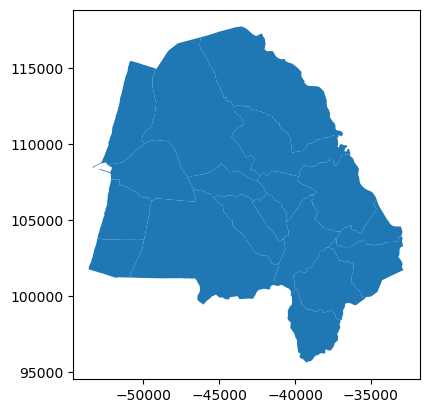

In [85]:
shape_AVRILH_FREGS11 = BGRI11_AVRILH.dissolve(by=["DICOFRE"], as_index=False)
print(shape_AVRILH_FREGS11.head())
shape_AVRILH_FREGS11.plot()

## Assign clusters: Overlap nodes atributes with "FREGUESIAS11""

In [ ]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEFREGS11 = gpd.sjoin(gdf_nodes_PTcrs_AVRILHOri_full_db_PCA, shape_AVRILH_FREGS11[["DICOFRE", "geometry"]], how="left", predicate='intersects')
print(gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEFREGS11.columns)
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEFREGS11.head()

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,            10,            11,
                  12,            13,            14,            15,
             'osmid',    'geometry', 'index_right',     'DICOFRE'],
      dtype='object')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,osmid,geometry,index_right,DICOFRE
0,-1.017654,-0.289915,1.439985,-1.940020,-0.584064,-0.831864,1.491476,-0.196011,-0.464940,0.180441,0.048880,-0.724075,-1.086519,1.433112,-0.909541,0.861083,26018652,POINT (-36240.866 100587.667),13,010514
1,-0.937415,-0.444248,1.431632,-2.051705,-0.512686,-0.925572,1.713602,-0.222954,-0.361477,0.081259,0.163066,-0.715358,-1.081893,1.362139,-0.790838,0.868614,26018669,POINT (-36207.316 99931.795),13,010514
2,5.660074,5.212804,-5.342864,-2.584561,1.991947,8.069591,-0.041628,0.039779,4.356668,-0.784657,2.275259,-5.812810,-1.756486,2.215339,-0.373755,2.028368,26018671,POINT (-36175.496 100039.002),13,010514
3,5.761233,1.659789,-4.998370,-1.359095,1.181509,3.890934,-0.115911,0.186719,2.394496,0.015720,1.231987,-1.240272,-0.117959,1.730586,-0.734931,0.140295,26019628,POINT (-50539.674 106654.463),15,011002
4,6.306318,2.939258,-4.741841,-2.540861,0.750059,6.055908,0.022314,-0.050201,3.433773,0.201950,1.647413,-3.068247,-0.462553,0.811183,0.990635,0.558032,26019631,POINT (-50183.405 106500.389),15,011002


In [89]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEFREGS11.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,            10,            11,
                  12,            13,            14,            15,
             'osmid',    'geometry', 'index_right',     'DICOFRE'],
      dtype='object')

In [90]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEFREGS11.rename(columns = {0:'PCA_01', 1:'PCA_02', 2:'PCA_03',
                                                                        3:'PCA_04', 4:'PCA_05', 5:'PCA_06',
                                                                        6:'PCA_07', 7:'PCA_08', 8:'PCA_09',
                                                                        9:'PCA_10', 10:'PCA_11', 11:'PCA_12',
                                                                        12:'PCA_13', 13:'PCA_14', 14:'PCA_15',
                                                                        15:'PCA_16'}, inplace = True)

In [91]:
gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEFREGS11.columns

Index(['PCA_01', 'PCA_02', 'PCA_03', 'PCA_04', 'PCA_05', 'PCA_06', 'PCA_07',
       'PCA_08', 'PCA_09', 'PCA_10', 'PCA_11', 'PCA_12', 'PCA_13', 'PCA_14',
       'PCA_15', 'PCA_16', 'osmid', 'geometry', 'index_right', 'DICOFRE'],
      dtype='object')

## Calculate Clusters intrinsic validation fit 

In [101]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

data_fregs11 = gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEFREGS11[["PCA_01","PCA_02","PCA_03",
                                                                                    "PCA_04","PCA_05","PCA_06",
                                                                                    "PCA_07","PCA_08","PCA_09",
                                                                                    "PCA_10","PCA_11","PCA_12",
                                                                                    "PCA_13","PCA_14","PCA_15",'PCA_16']]
clusters_fregs11  = gdf_nodes_PTcrs_AVRILHOri_full_db_PCA_withINEFREGS11[["DICOFRE"]]

CH = calinski_harabasz_score(data_fregs11, clusters_fregs11)
print("Calinski-Harabasz Index: «a higher Calinski-Harabasz score relates to a model with better defined clusters.»")
print("Calinski-Harabasz Index: ", CH)
print(" ")
DB = davies_bouldin_score(data_fregs11, clusters_fregs11)
print("Davies-Bouldin Index: «Zero is the lowest possible score. Values closer to zero indicate a better partition.»")
print("Davies-Bouldin Index: ", DB)
print(" ")
Silh = silhouette_score(data_fregs11, clusters_fregs11, metric="euclidean")
print("Silhouette Coefficient: higher Silhouette Coefficient score relates to a model with better defined clusters; zero - overlaping clusters \n -1 for incorrect clustering»")
print("Silhouette Coefficient: ", Silh)

c:\Users\pauloricardolb\Anaconda3\envs\geopreprocess\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\pauloricardolb\Anaconda3\envs\geopreprocess\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\pauloricardolb\Anaconda3\envs\geopreprocess\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Calinski-Harabasz Index: «a higher Calinski-Harabasz score relates to a model with better defined clusters.»
Calinski-Harabasz Index:  6.590561333596724
 
Davies-Bouldin Index: «Zero is the lowest possible score. Values closer to zero indicate a better partition.»
Davies-Bouldin Index:  10.437277335596258
 
Silhouette Coefficient: higher Silhouette Coefficient score relates to a model with better defined clusters; zero - overlaping clusters 
 -1 for incorrect clustering»»
Silhouette Coefficient:  -0.22379594899804642


# AVRILH "LABELED"

In [123]:
open_file = open(sourcePIKLE + '/avrilh_network_wgs84_dfnodes_withLabels.pkl', "rb")
avrilh_network_wgs84_dfnodes_withLabels = pickle.load(open_file)
open_file.close()

In [127]:
avrilh_network_wgs84_dfnodes_withLabels.head()

,y,x,ref,highway,street_count,zone_id,label_propagation_adj_matrix_dist_output_labels,label_propagation_adj_matrix_contig_output_labels
26018652,40.573359,-8.561106,15,motorway_junction,3,-1,89,89
26018669,40.567454,-8.560672,NaN,NaN,3,-1,0,0
26018671,40.568421,-8.560302,15,motorway_junction,3,-1,89,89
26019628,40.627240,-8.730450,1,motorway_junction,3,-1,36,36
26019631,40.625874,-8.726227,1A,motorway_junction,3,-1,82,25


In [130]:
avrilh_network_wgs84_dfnodes_withLabels_match = avrilh_network_wgs84_dfnodes_withLabels[avrilh_network_wgs84_dfnodes_withLabels.index.isin(OSMID_gdf_nodes_PTcrs_AVRILHOri_full_db_toPCA_withoutNA)]
print(avrilh_network_wgs84_dfnodes_withLabels_match.shape)
avrilh_network_wgs84_dfnodes_withLabels_match.head()

(3579, 8)


,y,x,ref,highway,street_count,zone_id,label_propagation_adj_matrix_dist_output_labels,label_propagation_adj_matrix_contig_output_labels
26019651,40.631136,-8.690909,2,motorway_junction,3,-1,82,25
26019652,40.631237,-8.690964,NaN,NaN,3,-1,36,36
267983421,40.633750,-8.746970,NaN,crossing,5,-1,104,104
267983429,40.642880,-8.746363,NaN,crossing,3,-1,73,73
267983444,40.636225,-8.747027,NaN,NaN,3,-1,104,73


In [131]:
avrilh_network_wgs84_dfnodes_withLabels_match = avrilh_network_wgs84_dfnodes_withLabels_match.reset_index()
avrilh_network_wgs84_dfnodes_withLabels_match = avrilh_network_wgs84_dfnodes_withLabels_match.drop(columns=["y", "x", "ref", "highway", "street_count", "zone_id"])
avrilh_network_wgs84_dfnodes_withLabels_match = avrilh_network_wgs84_dfnodes_withLabels_match.rename(columns={"index": "osmnid"})
avrilh_network_wgs84_dfnodes_withLabels_match.head()

,osmnid,label_propagation_adj_matrix_dist_output_labels,label_propagation_adj_matrix_contig_output_labels
0,26019651,82,25
1,26019652,36,36
2,267983421,104,104
3,267983429,73,73
4,267983444,104,73


In [134]:
len(avrilh_network_wgs84_dfnodes_withLabels_match.label_propagation_adj_matrix_dist_output_labels.unique())

106